# Predict survival on the Titanic
In this Lab, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy

### Dataset
The dataset contains 891 observations of 12 variables:
* **PassengerId**: Unique ID for each passenger
* **Survived**: Survival (0 = No; 1 = Yes)
* **Pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **Name**: Name
* **Sex**: Sex
* **Age**: Age
* **Sibsp**: Number of Siblings/Spouses Aboard
* **Parch**: Number of Parents/Children Aboard
* **Ticket**: Ticket Number
* **Fare**: Passenger Fare
* **Cabin**: Cabin
* **Embarked** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# your code here

In [ ]:
titanic = pd.read_csv('titanic.csv', index_col=0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(titanic.dtypes.value_counts())
print(titanic.shape)

object     5
int64      4
float64    2
dtype: int64
(891, 11)


Looks like there are some Nan values, let's see how many for each column

In [ ]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Cabin** contains a lot of Nan values, we'll drop this column <br>
We'll replace the Nan values in **Age** with the age's median, and the ones in **Embarked** with **'S'**, which is the most frequent one in this column

In [ ]:
to_drop =['Cabin']
titanic.drop(to_drop, axis = 1, inplace = True)

# check the fillna documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

titanic["Age"]= titanic["Age"].fillna(titanic["Age"].median())
titanic["Embarked"].fillna("s")
print(titanic.isnull().sum())
print(titanic["Age"])



Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64
PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    28.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64


## Visualization

survival rate = 0.3838383838383838


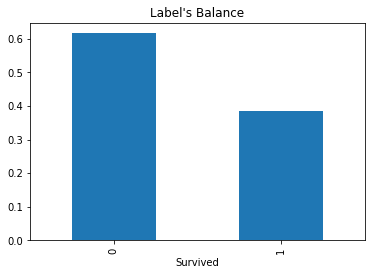

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
print ('survival rate =', titanic.Survived.mean())
(titanic.groupby('Survived').size()/titanic.shape[0]).plot(kind="bar",title="Label's Balance")


In [ ]:
# make a function to plot survival against passenger attribute
def survival_rate(column,t):
    df=pd.DataFrame()
    df['total']=titanic.groupby(column).size()
    df['survived'] = titanic.groupby(column).sum()['Survived']
    df['percentage'] = round(df['survived']/df['total']*100,2)
    print(df)

    df['survived'].plot(kind=t)
    df['total'].plot(kind=t,alpha=0.5,title="Survivors per "+str(column))
    plt.show()

        total  survived  percentage
Sex                                
female    314       233       74.20
male      577       109       18.89


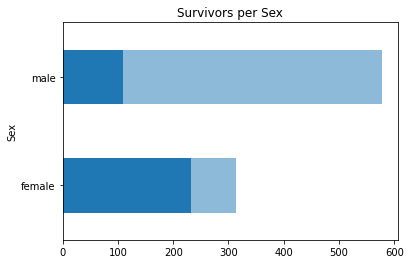

In [ ]:
# Draw survival per Sex
survival_rate("Sex","barh")

        total  survived  percentage
Pclass                             
1         216       136       62.96
2         184        87       47.28
3         491       119       24.24


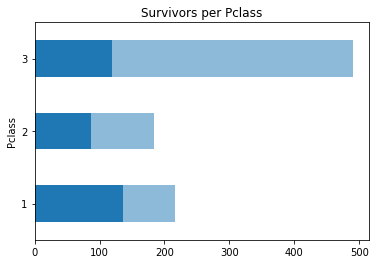

In [ ]:
# Draw survival per Class
survival_rate("Pclass","barh")

          total  survived  percentage
Embarked                             
C           168        93       55.36
Q            77        30       38.96
S           644       217       33.70


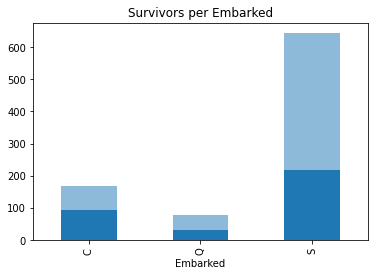

In [ ]:
# Graph survived per port of embarkation
survival_rate("Embarked","bar")

       total  survived  percentage
Parch                             
0        678       233       34.37
1        118        65       55.08
2         80        40       50.00
3          5         3       60.00
4          4         0        0.00
5          5         1       20.00
6          1         0        0.00


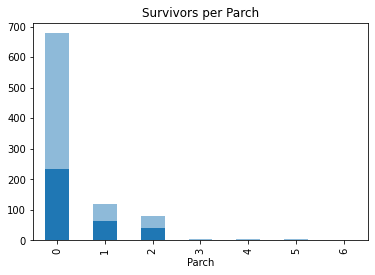

In [ ]:
# Draw survived per Number of Parents/Children Aboard (Parch)

survival_rate("Parch", "bar")

       total  survived  percentage
SibSp                             
0        608       210       34.54
1        209       112       53.59
2         28        13       46.43
3         16         4       25.00
4         18         3       16.67
5          5         0        0.00
8          7         0        0.00


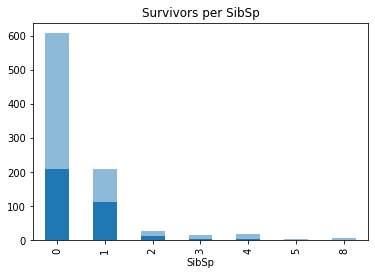

In [ ]:
# Draw survived per Number of Siblings/Spouses Aboard (SibSp)

survival_rate("SibSp", "bar")

## Model training

Some of the columns don't have predictive power, so let's specify which ones are included for prediction

In [ ]:
predictors = ["Pclass", "Sex", "Age", 'SibSp' ,'Parch', "Fare", "Embarked"]  

We need now to convert text columns in **predictors** to numerical ones

In [ ]:
for col in predictors: # Loop through all columns in predictors
    if titanic[col].dtype == 'object':  # check if column's type is object (text)
        titanic[col] = pd.Categorical(titanic[col]).codes  # convert text to numerical

titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [ ]:
# Split the data into a training set and a testing set. Set: test_size=0.3, random_state=1
from sklearn.model_selection import train_test_split

#Y = titanic[["Survived"]]
Y = titanic.Survived
X = titanic[predictors]
print(X.describe())
print(Y.describe())

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)
print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

           Pclass         Sex         Age  ...       Parch        Fare    Embarked
count  891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean     2.308642    0.647587   29.361582  ...    0.381594   32.204208    1.529742
std      0.836071    0.477990   13.019697  ...    0.806057   49.693429    0.800254
min      1.000000    0.000000    0.420000  ...    0.000000    0.000000   -1.000000
25%      2.000000    0.000000   22.000000  ...    0.000000    7.910400    1.000000
50%      3.000000    1.000000   28.000000  ...    0.000000   14.454200    2.000000
75%      3.000000    1.000000   35.000000  ...    0.000000   31.000000    2.000000
max      3.000000    1.000000   80.000000  ...    6.000000  512.329200    2.000000

[8 rows x 7 columns]
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
train shape (623, 7) (623,)
test shape (

In [ ]:
# import LogisticRegression from: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.8073836276083467
test accuracy = 0.7723880597014925


Let's print the model's parameters

In [ ]:
coeff = pd.DataFrame()
coeff['Feature'] = X_train.columns
coeff['Coefficient Estimate'] = pd.Series(clf.coef_[0])
coeff.loc[len(coeff)]=['Intercept',clf.intercept_[0]]
print (coeff)

     Feature  Coefficient Estimate
0     Pclass             -1.157723
1        Sex             -2.704421
2        Age             -0.040836
3      SibSp             -0.333083
4      Parch              0.073972
5       Fare             -0.000618
6   Embarked             -0.232788
7  Intercept              5.406444


We now need to predict class labels for the test set. We will also generate the class probabilities

In [ ]:
# predict class labels for the test set
y_pred = clf.predict(X_test)
print (y_pred)

[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0
 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 1 0]


In [ ]:
# generate class probabilities : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


y_probs = clf.predict_proba(X_test)
print (y_probs)

[[0.14100295 0.85899705]
 [0.91567725 0.08432275]
 [0.12733641 0.87266359]
 [0.36538968 0.63461032]
 [0.07789601 0.92210399]
 [0.89081901 0.10918099]
 [0.80808975 0.19191025]
 [0.12047174 0.87952826]
 [0.49574919 0.50425081]
 [0.44660156 0.55339844]
 [0.90572367 0.09427633]
 [0.40105712 0.59894288]
 [0.76105753 0.23894247]
 [0.77389642 0.22610358]
 [0.36533412 0.63466588]
 [0.52026374 0.47973626]
 [0.92509241 0.07490759]
 [0.92823072 0.07176928]
 [0.93771354 0.06228646]
 [0.233346   0.766654  ]
 [0.92746423 0.07253577]
 [0.89797302 0.10202698]
 [0.03775872 0.96224128]
 [0.70255423 0.29744577]
 [0.2691121  0.7308879 ]
 [0.91250806 0.08749194]
 [0.06234378 0.93765622]
 [0.28858393 0.71141607]
 [0.75900407 0.24099593]
 [0.05780962 0.94219038]
 [0.3628989  0.6371011 ]
 [0.52087326 0.47912674]
 [0.52684107 0.47315893]
 [0.47282302 0.52717698]
 [0.93478241 0.06521759]
 [0.48507374 0.51492626]
 [0.60051832 0.39948168]
 [0.9156494  0.0843506 ]
 [0.4610695  0.5389305 ]
 [0.88678344 0.11321656]


As you can see, the classifier outputs two probabilities for each row. It's predicting a 1 (Survived) any time the probability in the second column is greater than 0.5. Let's visualize it all together.

In [ ]:
import numpy as np

pred = pd.DataFrame({        
        "Survived_original": y_test,
        "Survived_predicted": y_pred,
        "Survived_proba": np.transpose(y_probs)[1]      
        })
pred["Comparison"]= pred.Survived_original ==pred.Survived_predicted
pred.head()

,Survived_original,Survived_predicted,Survived_proba,Comparison
PassengerId,,,,
863,1,1,0.858997,True
224,0,0,0.084323,True
85,1,1,0.872664,True
681,0,1,0.634610,False
536,1,1,0.922104,True


## Confusion matrix

In [ ]:
from sklearn import metrics
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[129  24]
 [ 37  78]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       153
           1       0.76      0.68      0.72       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



As you can see, we can have the classification report for each class

## K-Fold Cross Validation

In [ ]:
# import cross_validation from: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
#from sklearn.model_selection import cross_validation
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
## see model 
print(scores)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

[0.77653631 0.78651685 0.78089888 0.76966292 0.82022472]
0.7867679367271359


When you are improving a model, you want to make sur that you are really doing it and not just being lucky. This is why it's good to work with cross validation instead of one train/test split.